In [1]:
def makegraph(row_number):
    from openpyxl import Workbook
    import openpyxl
    path = r"C:\Users\user122\Desktop\ANDcircuits.xlsx"
    wb_obj = openpyxl.load_workbook(path)
    sheet_obj = wb_obj.active
    cell_obj = sheet_obj.cell(row = row_number, column = 1)
    argv=cell_obj.value
    argv=argv.split('\n')

    nets=[]
    for n in argv:
            n=n.split()
            nets.extend([n])
    import matplotlib.pyplot as plt
    import networkx as nx
    edges=[]
    for i in nets:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edges.extend([[i[1], i[3]]])
            else:
                edges.extend([[i[1], i[2]]])
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.circular_layout(G)
    plt.figure()
    nx.draw(
        G, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in G.nodes()}
    )
    count=1
    edge_labels={}
    for i in nets:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                count+=1
            else:
                edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

    nx.draw_networkx_edge_labels(
        G, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()

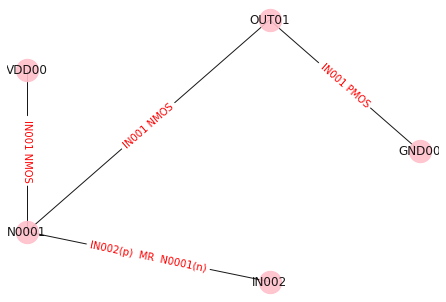

In [2]:
makegraph(5)

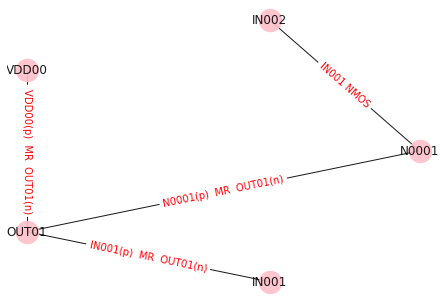

In [3]:
makegraph(70)

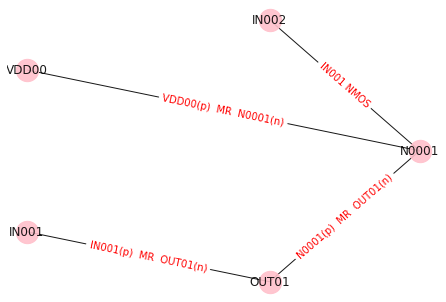

In [4]:
makegraph(72)

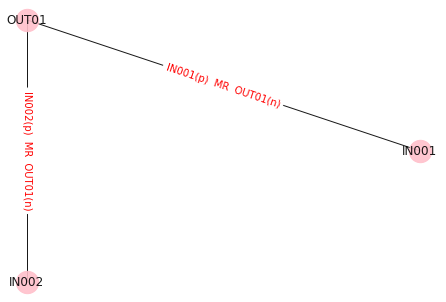

In [5]:
makegraph(1)